# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


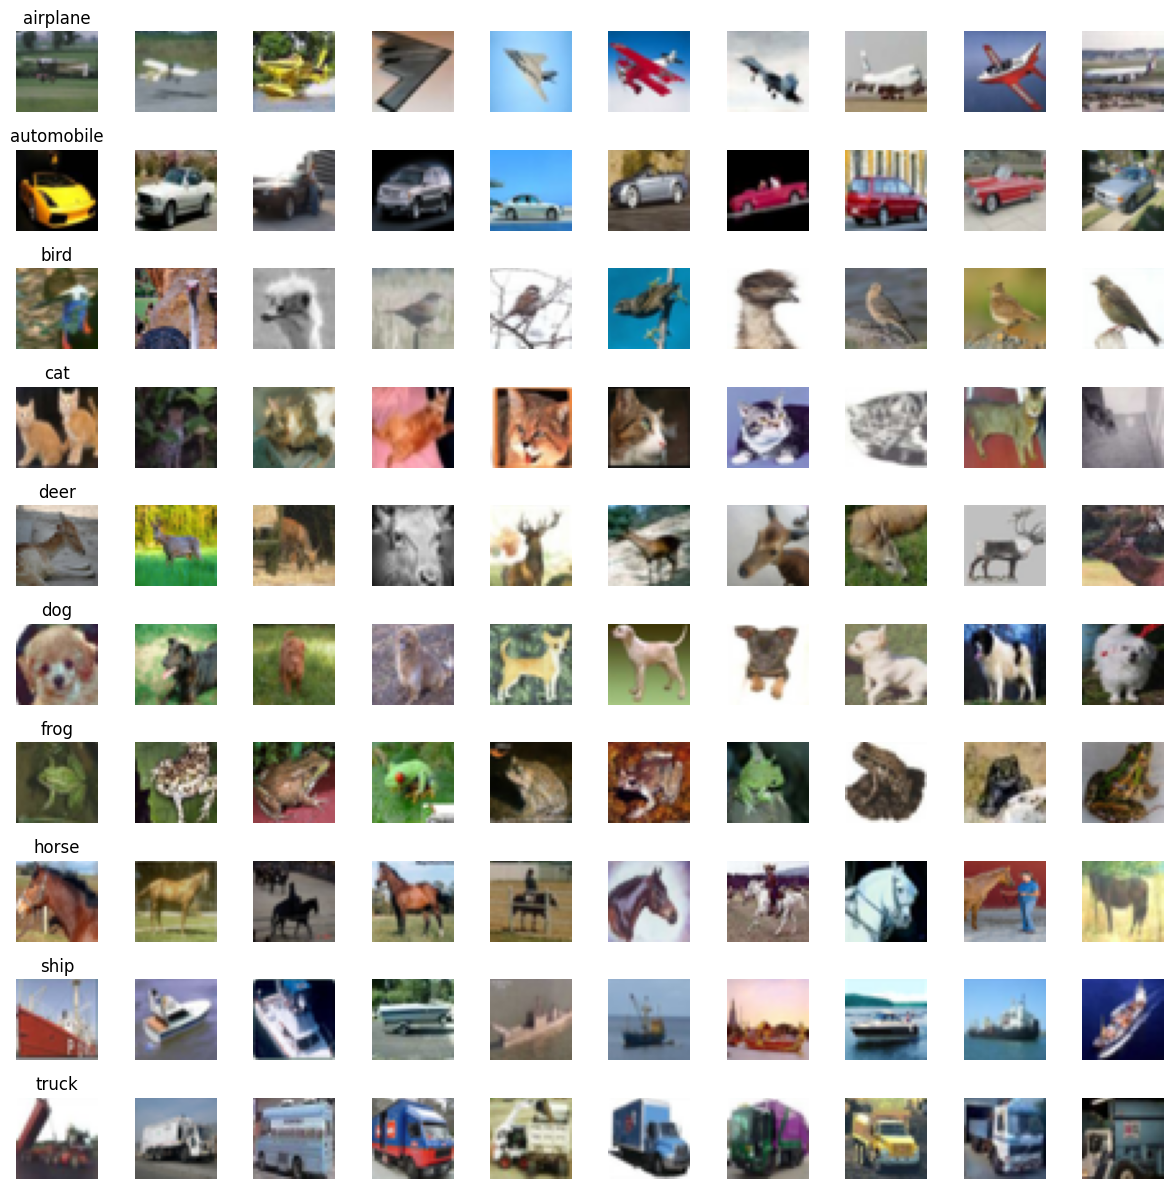

In [3]:
# Your code here :
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize 10 random samples from each class
plt.figure(figsize=(12, 12))
for class_index in range(10):
    # Get 10 random samples from this class
    class_indices = np.where(y_train.flatten() == class_index)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)

    for i, idx in enumerate(random_indices):
        plt.subplot(10, 10, class_index * 10 + i + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_index])

plt.tight_layout()
plt.show()

In [4]:
# Convert labels to one-hot encoded form
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print("One-hot encoded training labels shape:", y_train_categorical.shape)
print("One-hot encoded test labels shape:", y_test_categorical.shape)

One-hot encoded training labels shape: (50000, 10)
One-hot encoded test labels shape: (10000, 10)


In [5]:
# Normalize the images
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("Normalized training data range:", x_train_normalized.min(), "to", x_train_normalized.max())
print("Normalized test data range:", x_test_normalized.min(), "to", x_test_normalized.max())

Normalized training data range: 0.0 to 1.0
Normalized test data range: 0.0 to 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
from tensorflow.keras import models, layers
from tensorflow.keras.backend import clear_session

clear_session()

# Define the first CNN model
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("First CNN Model Architecture:")
model1.summary()


First CNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
# Compile the model
model1.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")

Model compiled successfully


*   Plot the cross entropy loss curve and the accuracy curve

In [12]:
# Your code here :
# Train the first model for 50 epochs with batch size 512
history1 = model1.fit(
    x_train_normalized,
    y_train_categorical,
    batch_size=512,
    epochs=50,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.1584 - loss: 2.2721 - val_accuracy: 0.2602 - val_loss: 2.1533
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2681 - loss: 2.1158 - val_accuracy: 0.2883 - val_loss: 2.0218
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2968 - loss: 2.0033 - val_accuracy: 0.3084 - val_loss: 1.9549
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3236 - loss: 1.9331 - val_accuracy: 0.3319 - val_loss: 1.9077
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3392 - loss: 1.9031 - val_accuracy: 0.3424 - val_loss: 1.8828
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3491 - loss: 1.8675 - val_accuracy: 0.3483 - val_loss: 1.8461
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3618 - loss: 1.8342 - val_accuracy: 0.3600 - val_loss: 1.8300
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3631 - loss: 1.8176 - val_accuracy: 0.3519 - v

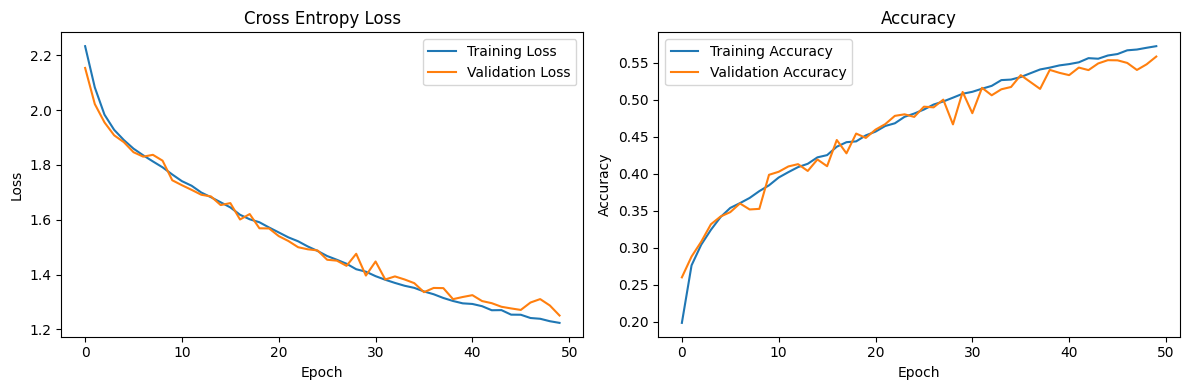

In [13]:
# Plot the cross entropy loss curve and the accuracy curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [14]:
from keras.backend import clear_session
clear_session()

In [15]:
# Your code here :
# Define deeper VGG-style model
model2 = models.Sequential([
    # First block: two conv layers with 32 filters
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("Deeper VGG Model Architecture:")
model2.summary()

Deeper VGG Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [16]:
# Your code here :
# Compile the model
model2.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("VGG model compiled successfully")

VGG model compiled successfully


In [18]:
# Train the VGG model for 50 epochs
history2 = model2.fit(
    x_train_normalized,
    y_train_categorical,
    batch_size=512,
    epochs=50,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.1650 - loss: 2.2509 - val_accuracy: 0.2538 - val_loss: 2.1309
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2653 - loss: 2.0823 - val_accuracy: 0.2874 - val_loss: 2.0294
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.2971 - loss: 1.9793 - val_accuracy: 0.3235 - val_loss: 1.9049
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3334 - loss: 1.9034 - val_accuracy: 0.3545 - val_loss: 1.8412
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3486 - loss: 1.8544 - val_accuracy: 0.3657 - val_loss: 1.8065
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3664 - loss: 1.8127 - val_accuracy: 0.3748 - val_loss: 1.7822
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3813 - loss: 1.7715 - val_accuracy: 0.3784 - val_loss: 1.7560
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3828 - loss: 1.7561 - val_accuracy: 0.3915 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


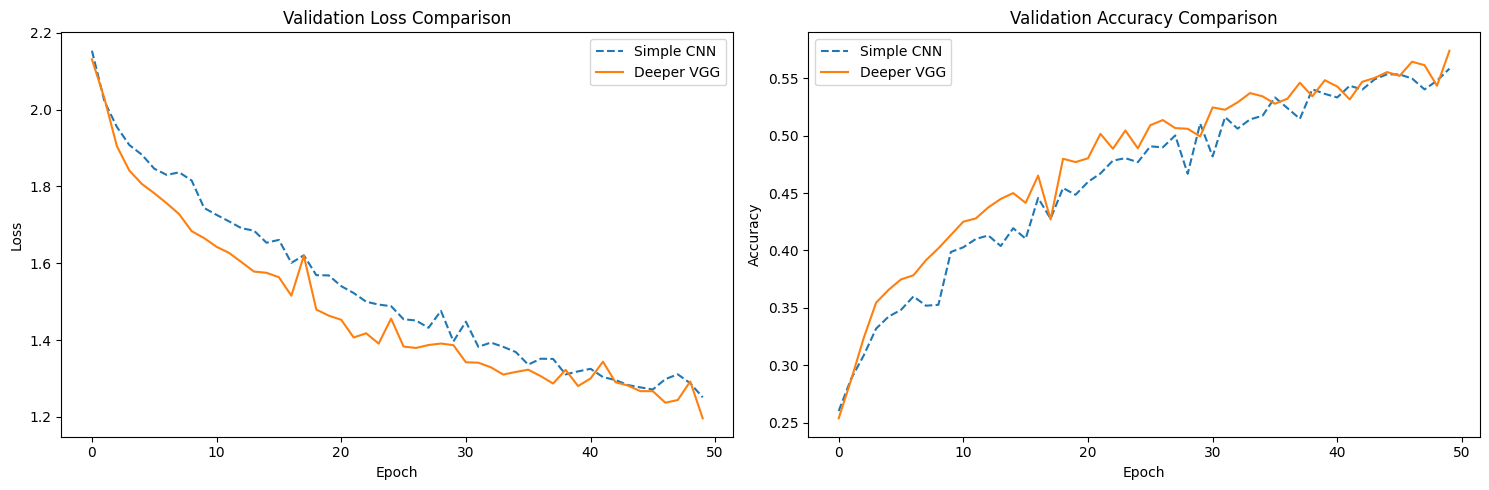

In [19]:
# Your code here :
# Compare performance of both models
plt.figure(figsize=(15, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_loss'], label='Simple CNN', linestyle='--')
plt.plot(history2.history['val_loss'], label='Deeper VGG')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_accuracy'], label='Simple CNN', linestyle='--')
plt.plot(history2.history['val_accuracy'], label='Deeper VGG')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Print final accuracy for both models
final_acc1 = history1.history['val_accuracy'][-1]
final_acc2 = history2.history['val_accuracy'][-1]

print(f"Simple CNN Final Validation Accuracy: {final_acc1:.4f}")
print(f"Deeper VGG Final Validation Accuracy: {final_acc2:.4f}")

Simple CNN Final Validation Accuracy: 0.5584
Deeper VGG Final Validation Accuracy: 0.5740


**Comment on the observation**

*(Double-click or enter to edit)*

The deeper VGG model has better performance (+1.56%) but the improvement is modest. This suggests that:

Deeper architectures can capture more complex features
But it may need more epochs or hyperparameter tuning
CIFAR-10 dataset is challenging for simple models
The small difference indicates both models may be under-trained or need better regularizatio
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predictions completed


<Figure size 1000x800 with 0 Axes>

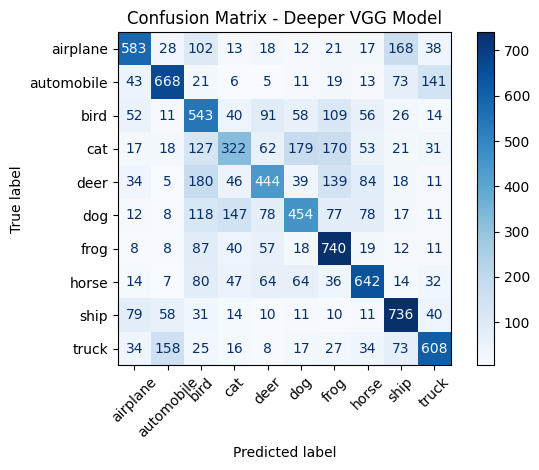

In [22]:
# Your code here :
# Use predict function to predict the output for the test split
predictions = model2.predict(x_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

print("Predictions completed")

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Deeper VGG Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [24]:
# Your code here :
# Print test accuracy
test_loss, test_accuracy = model2.evaluate(x_test_normalized, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5740


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [25]:
from keras.backend import clear_session
clear_session()

In [26]:
# Your code here :
# Resize images to 64x64 as requested
from tensorflow.keras.layers import Resizing

# Define complete VGG architecture
model3 = models.Sequential([
    # Resize input to 64x64
    Resizing(64, 64, input_shape=(32, 32, 3)),

    # First block: two conv layers with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second block: two conv layers with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third block: two conv layers with 256 filters
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Classifier
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("Complete VGG Architecture:")
model3.summary()

Complete VGG Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [27]:
# Your code here :
# Compile the model
model3.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Complete VGG model compiled successfully")

Complete VGG model compiled successfully


In [28]:
# Train the complete VGG model for 10 epochs
history3 = model3.fit(
    x_train_normalized,
    y_train_categorical,
    batch_size=512,
    epochs=10,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 820ms/step - accuracy: 0.1128 - loss: 2.3004 - val_accuracy: 0.1022 - val_loss: 2.2924
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.1081 - loss: 2.2866 - val_accuracy: 0.1763 - val_loss: 2.2536
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 381ms/step - accuracy: 0.1909 - loss: 2.2188 - val_accuracy: 0.2404 - val_loss: 2.1156
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.2461 - loss: 2.1035 - val_accuracy: 0.2678 - val_loss: 2.0183
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.2827 - loss: 2.0122 - val_accuracy: 0.3176 - val_loss: 1.9068
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.3129 - loss: 1.9510 - val_accuracy: 0.3427 - val_loss: 1.8732
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.3400 - loss: 1.8752 - val_accuracy: 0.3564 - val_loss: 1.7966
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.3607 - loss: 1.8146 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


<Figure size 1000x800 with 0 Axes>

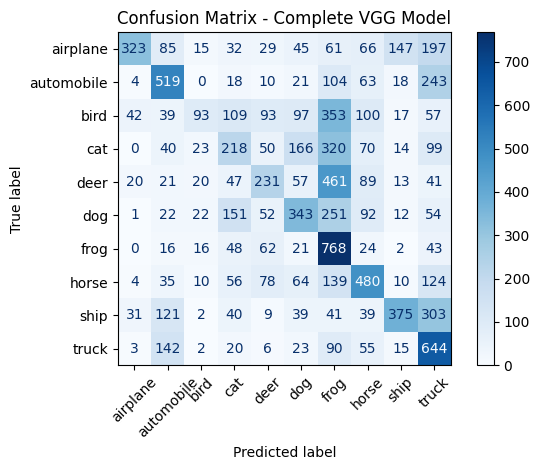

In [29]:
# Predict the output for the test split
predictions_vgg = model3.predict(x_test_normalized)
predicted_classes_vgg = np.argmax(predictions_vgg, axis=1)

# Plot confusion matrix for the new model
cm_vgg = confusion_matrix(true_classes, predicted_classes_vgg)
disp_vgg = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=class_names)

plt.figure(figsize=(10, 8))
disp_vgg.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Complete VGG Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Common confusions in CIFAR-10 typically occur between:

Cat vs Dog (similar animals)
Deer vs Horse (four-legged animals)
Bird vs Airplane (similar shapes in sky)
Automobile vs Truck (similar vehicles)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Introduce non-linearity to the network
Allow the network to learn complex patterns
Without activation functions, the network would be just linear transformations
Enable backpropagation by providing differentiable non-linearities

2 - Key Differences between sigmoid and softmax:

Sigmoid: Used for binary classification, outputs independent probabilities (0 to 1)
Softmax: Used for multi-class classification, outputs probability distribution that sums to 1
Sigmoid treats each class independently, softmax considers inter-class relationships
Softmax is preferred for mutually exclusive multi-class problems

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy: For multi-class classification (2+ classes), uses one-hot encoding
Binary crossentropy: For binary classification (2 classes), uses single output with sigmoid
Sparse categorical crossentropy: Alternative that uses integer labels instead of one-hot
Choice depends on the number of classes and label encoding format
